In [2]:
#!pip install torch numpy pandas matplotlib

In [3]:
import torch
import numpy as np

### Create a Numpy Array and compute 2 * x + y

In [4]:
x = np.array([[1,2,3], [4,5,6]])
y = np.array([[7,8,9], [10,11,12]])
f = 2 * x + y
print(f)

[[ 9 12 15]
 [18 21 24]]


### Create a Tensor and compute 2 * x + y

In [5]:
x = torch.tensor([[1,2,3], [4,5,6]])
y = torch.tensor([[7,8,9], [10,11,12]])
f = 2 * x + y
print(f)

tensor([[ 9, 12, 15],
        [18, 21, 24]])


### Default Value Initialization

In [6]:
shape = [2,3]
xzeros = torch.zeros(shape)
xones = torch.ones(shape)
xrnd = torch.rand(shape)
print(xzeros)
print(xones)
print(xrnd)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.9754, 0.3332, 0.6192],
        [0.2429, 0.7999, 0.9842]])


### Bad way to set seed (global seed)

In [7]:
torch.manual_seed(42)
print(torch.rand([2,3]))

tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])


### Good way to set seed (using generator)

In [8]:
generator = torch.Generator().manual_seed(42)
print(torch.rand([2,3], generator=generator))

tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])


### Converting between tensors and NumPy arrays

In [9]:
xnp = np.array([[1,2,3],[4,5,6]])
f2 = y + xnp
print(f2)
f2.type()

tensor([[ 8, 10, 12],
        [14, 16, 18]])


'torch.LongTensor'

In [10]:
print(f.type()) # call the tensors type method
fnp = f.numpy() # create an array from the tensor
type(fnp) # uses the python inbuilt type()

torch.LongTensor


numpy.ndarray

In [11]:
xtensor = torch.tensor(xnp) # Don't use torch.from_numpy
print(xtensor)
print(xtensor.type())

tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)
torch.IntTensor


In [12]:
a = np.ones(3)                  
t = torch.tensor(a)      # create a tensor from an array
b = t.numpy()                # Create an array from the tensor
b[1] = 0                     # change a value in the array
print(a[1] == b[1])          # this value changes in the original array
print(t)                     # and also in the tensor - they share the same memory

False
tensor([1., 0., 1.], dtype=torch.float64)


### Data Types with Numpy and Pytorch

In [13]:
int8np = np.ones((2,3), dtype=np.int8)
bad = torch.tensor(int8np)
bad.type()

'torch.CharTensor'

In [14]:
not_so_good = torch.tensor(int8np.astype(np.int32))
not_so_good.type()

'torch.IntTensor'

In [15]:
good = torch.tensor(int8np, dtype=torch.int)
good.type()

'torch.IntTensor'

In [16]:
xint = torch.ones((2,3), dtype=torch.int)
xint.type()

'torch.IntTensor'

### Slicing and indexing and reshaping

In [17]:
print(x[0])
print(x[1][0:2])

tensor([1, 2, 3])
tensor([4, 5])


In [18]:
print(x)
print(x.size())
print(x.view(-1))
print(x.view(3,2))
print(x.view(6,1))

tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])
tensor([1, 2, 3, 4, 5, 6])
tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])


In [19]:
print(x.view(3,-1))

tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [20]:
print(x.transpose(0,1).size())
x.size()

torch.Size([3, 2])


torch.Size([2, 3])

In [21]:
a = torch.ones(1,2,3,4)
print(a.transpose(0,3).transpose(1,2).size())    #swaps axis in two steps
print(a.permute(3,2,1,0).size())                 #swaps all axis at once

torch.Size([4, 3, 2, 1])
torch.Size([4, 3, 2, 1])


In [22]:
print(x)
x.transpose_(1,0)
print(x)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 4],
        [2, 5],
        [3, 6]])


## 1. Load fish.csv and convert it to a tensor but ignore first column (Species). Split column "Width" as target variable and all other as input variables

In [23]:
import pandas as pd
fish_data = pd.read_csv('fish.csv')
fish_data

,Species,Length1,Length2,Length3,Height,Width
0,Bream,23.2,25.4,30.0,11.5200,4.0200
1,Bream,24.0,26.3,31.2,12.4800,4.3056
2,Bream,23.9,26.5,31.1,12.3778,4.6961
3,Bream,26.3,29.0,33.5,12.7300,4.4555
4,Bream,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,13.2,14.3,15.2,2.8728,2.0672


In [24]:
X = fish_data[['Length1', 'Length2', 'Length3', 'Height']].to_numpy() # Input variables (Numpy)
y = fish_data[['Width']].to_numpy() # Target Variable (Numpy)
X,y = torch.tensor(X), torch.tensor(y)

## 2. Split fish_data into training (n=127) and test set (n=32), randomly.

In [25]:
generator = torch.Generator().manual_seed(42)
idx = torch.randperm(X.shape[0], generator=generator)
X_train, X_test = X[idx[:127],:], X[idx[127:],:]
y_train, y_test = y[idx[:127],:], y[idx[127:],:]
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

torch.Size([127, 4]) torch.Size([32, 4])
torch.Size([127, 1]) torch.Size([32, 1])


## 3.1. Normalize Dataset: X = (X - X.min) / (X.max - X.min)

In [26]:
# Lambda Function
normalize = lambda z, z_min, z_max: (z - z_min) / (z_max - z_min + 1e-5) 

# Normalize X
x_min, x_max = X_train.min(0, keepdims=True)[0], X_train.max(0, keepdims=True)[0]
X_train_n, X_test_n = normalize(X_train, x_min, x_max), normalize(X_test, x_min, x_max)
# Normalize y
y_min, y_max = y_train.min(0, keepdims=True)[0], y_train.max(0, keepdims=True)[0]
y_train_n, y_test_n = normalize(y_train, y_min, y_max), normalize(y_test, y_min, y_max)

## 3.2. Standardize Dataset: X = (X - X.mean) / X.std

In [27]:
# Lambda Function
standardize = lambda z, z_mean, z_std: (z - z_mean) / (z_std + 1e-5) 

# Standardize X
x_mean, x_std = X_train.mean(0, keepdims=True), X_train.std(0, keepdims=True)
X_train_s, X_test_s = standardize(X_train, x_mean, x_std), standardize(X_test, x_mean, x_std)
# Standardize y
y_mean, y_std = y_train.mean(0, keepdims=True), y_train.std(0, keepdims=True)
y_train_s, y_test_s = standardize(y_train, y_mean, y_std), standardize(y_test, y_mean, y_std)

## 4. Plot normalized, standardized vs non-normalized

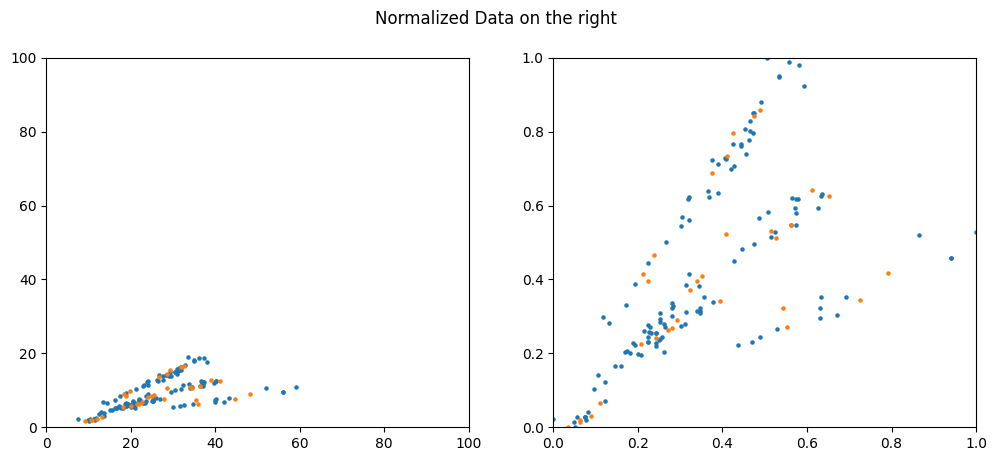

In [28]:
from matplotlib import pyplot as plt
# Create Subplot with two Figures
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.suptitle('Normalized Data on the right')

# Plot original data
ax1.set_ylim(0,100), ax1.set_xlim(0,100) # Set axis to be in range (0,100)
ax1.scatter(X_train[:,0], X_train[:,3], s=5) # Plot train data in blue
ax1.scatter(X_test[:,0], X_test[:,3], s=5) # Plot test data in orange

# Plot normalized data
ax2.set_ylim(0,1), ax2.set_xlim(0,1) # Set axis to be in range (0, 1)
ax2.scatter(X_train_n[:,0], X_train_n[:,3], s=5) # Plot train data in blue
ax2.scatter(X_test_n[:,0], X_test_n[:,3], s=5) # Plot test data in orange

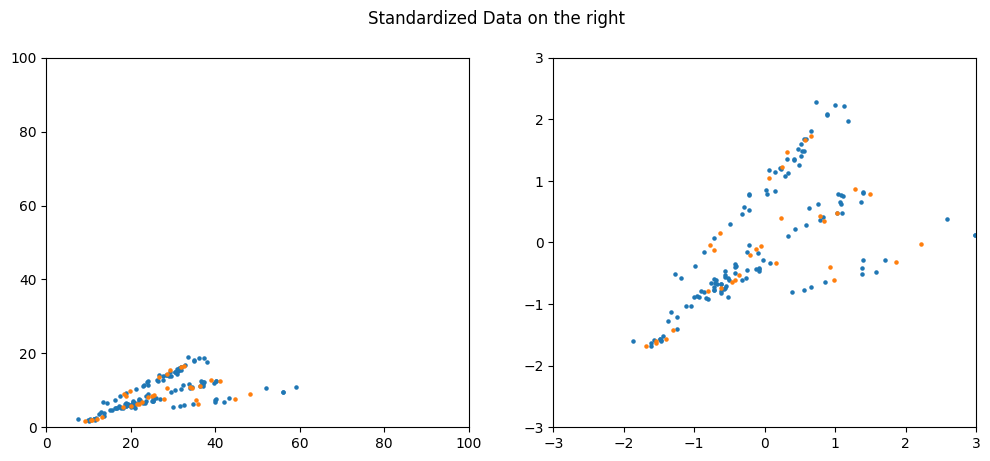

In [29]:
# Create Subplot with two Figures
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.suptitle('Standardized Data on the right')

# Plot original data
ax1.set_ylim(0,100), ax1.set_xlim(0,100) # Set axis to be in range (0,100)
ax1.scatter(X_train[:,0], X_train[:,3], s=5) # Plot train data in blue
ax1.scatter(X_test[:,0], X_test[:,3], s=5) # Plot test data in orange

# Plot standardized data
ax2.set_ylim(-3,3), ax2.set_xlim(-3,3) # Set axis to be in range (-3, 3)
ax2.scatter(X_train_s[:,0], X_train_s[:,3], s=5) # Plot train data in blue
ax2.scatter(X_test_s[:,0], X_test_s[:,3], s=5) # Plot test data in orange

## 5. Create Dummy Variables for Species

In [30]:
# Create Dummy Variables
dataset = pd.get_dummies(fish_data[['Length1', 'Length2', 'Length3', 'Height', 'Species']], dtype=float).to_numpy()
dataset

array([23.2 , 25.4 , 30.  , 11.52,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ])